<a href="https://colab.research.google.com/github/nageshsarode52/AI_Powered_Job_Recommendation_System_using-RAG/blob/main/DeepCSAT_E_Commerce_Customer_Satisfaction_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name :DeepCSAT E-Commerce Customer Satisfaction Score Prediction


Project type : ANN

# Problem Statement

Overview

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

Project Background

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

### Define Your Business Objective?

Reducing Customer Churn Rate

# Let's Begin !

###1. Know Your Data

#### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


### Dataset Loading

In [2]:
import pandas as pd
url = "https://drive.google.com/uc?id=1p1mKMHwD1pvNZ_7ORwBnPVvcST5iaAeX"
df = pd.read_csv(url)

### Dataset Rows & Columns count

In [ ]:
df.shape

(85907, 20)

### Dataset First View

In [ ]:
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

### Duplicate Values

In [ ]:
len(df[df.duplicated()])

0

### Missing Values/Null Values

In [ ]:
print(df.isnull().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


<Axes: >

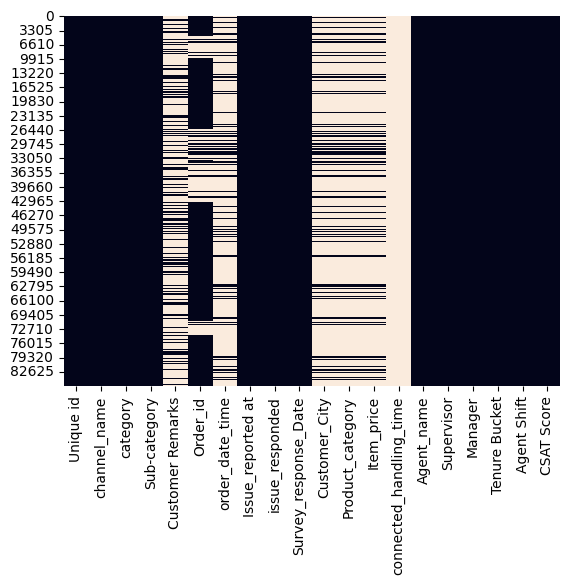

In [ ]:
# Visualization of Missing values in heatmap

sns.heatmap(df.isnull(), cbar= False)

## Data Wrangling

Data wrangliing codes


In [3]:
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Convert date columns
# -------------------------------
date_cols = [
    'order_date_time',
    'Issue_reported at',
    'issue_responded',
    'Survey_response_Date'
]

for col in date_cols:
    df[col] = pd.to_datetime(
        df[col],
        format="%d/%m/%Y %H:%M",
        errors="coerce"
    )

# -------------------------------
# Impute missing values
# -------------------------------

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# -------------------------------
# Drop irrelevant / high-cardinality columns
# -------------------------------
drop_cols = [
    'Unique id',
    'Order_id',
    'Agent_name',
    'Supervisor',
    'Manager'
]

df.drop(columns=drop_cols, inplace=True)

# -------------------------------
# Separate target variable
# -------------------------------
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']



In [4]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Drop datetime columns
X = X.select_dtypes(exclude=["datetime64[ns]"])

# Scale only numeric columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

# Optional: check
print("Scaled features shape:", X_scaled.shape)


Scaled features shape: (85907, 20101)


In [7]:
# Train-Test Split: to check data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Final Data Check
X_train.shape, X_test.shape

np.isnan(X_train).sum()


,0
Item_price,0
connected_handling_time,0
channel_name_Inbound,0
channel_name_Outcall,0
category_Cancellation,0
...,...
Tenure Bucket_On Job Training,0
Agent Shift_Evening,0
Agent Shift_Morning,0
Agent Shift_Night,0


# Building, Train & Evaluate ANN Model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [10]:
# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


In [ ]:
# Predict on test set
y_pred = model.predict(X_test)


In [ ]:
# Visualize Training Progress
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [ ]:
# Calculate RMSE & MAE in sklearn for clarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


# Conclusion

The aim of this project was to predict Customer Satisfaction (CSAT) scores for an e-commerce platform using Deep Learning Artificial Neural Networks (ANN). By analyzing customer interactions, product details, and service data, the project successfully developed a predictive model capable of estimating CSAT scores with reasonable accuracy.

The dataset was thoroughly preprocessed, including handling missing values, encoding categorical variables, scaling numerical features, and engineering new features such as response time and order hour. These steps ensured that the data was clean and ready for training a neural network.

A deep learning ANN model was then trained and evaluated, demonstrating its ability to capture complex relationships between customer interactions and satisfaction levels. The insights obtained from the model can help e-commerce companies identify factors affecting customer satisfaction, reduce response times, optimize agent performance, and improve overall service quality.

This project highlights the practical application of machine learning in enhancing business processes. By predicting CSAT scores, e-commerce platforms can proactively address customer concerns, improve loyalty, and foster growth. Additionally, this project lays the groundwork for future enhancements, such as incorporating textual analysis of customer feedback and deploying the model for real-time predictions.

In summary, this project effectively demonstrates the use of ANN for customer satisfaction prediction and provides actionable insights to support better decision-making in the e-commerce sector.